# 데이콘 Basic 자동차 가격 예측 AI 경진대회

## 대회 정보
- 설명 : 자동차 생산년도, 브랜드, 종류 등 자동차와 관련된 데이터를 활용하여 자동차 가격을 예측하는 AI 모델을 개발
- 규칙 : 외부 데이터 사용 불가 

## 데이터 정보
train.csv
- 57920개의 데이터

test.csv
- 14480개의 데이터

## Column 설명
- ID : 샘플 별 고유 id
- 생산년도 : 차량이 생산된 연도
- 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
- 브랜드
- 차량모델명
- 판매도시 : 3글자로 인코딩된 도시 이름
- 판매구역 : 3글자로 인코딩된 구역 이름
- 주행거리 : 총 주행 거리(km)
- 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
- 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
- 경유 : 경유 자동차 여부
- 가솔린 : 가솔린 자동차 여부
- 하이브리드 : 하이브리드 자동차 여부
- 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
- 가격 : 자동차 가격(백만원)




## Import

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 
rc('font', family='AppleGothic')#맥 한글깨짐
import warnings
warnings.filterwarnings('ignore')

In [51]:
train= pd.read_csv("data/train.csv")

## 데이터 정보

In [3]:
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [19]:
train.shape


(57920, 15)

In [20]:
# 결측값 확인
train.isnull().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [8]:
#고유값
train.nunique()

ID             57920
생산년도              39
모델출시년도            34
브랜드               20
차량모델명            143
판매도시            3224
판매구역              17
주행거리           20994
배기량              347
압축천연가스(CNG)        2
경유                 2
가솔린                2
하이브리드              2
액화석유가스(LPG)        2
가격              2466
dtype: int64

In [52]:
#통계량 
train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


## 문자열 데이터 수치형 데이터 분리

In [18]:
#문자열 데이터 컬럼
obj_col=list(train.select_dtypes(include="object").columns)
#target 컬럼 추가 
obj_tar_col = obj_col.copy()
obj_tar_col.append('가격')
#수치형 데이터 컬럼
num_col=list(train.select_dtypes(include=["int64","float64"]).columns)


In [59]:
train[train['가솔린']==train['하이브리드']==train['경유']==train['액화석유가스(LPG)']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [21]:
#수치형 문자열 데이터프레임 분리 
train_obj = train[obj_col]
train_obj_tar = train[obj_tar_col]
train_num = train[num_col]

## 상관관계

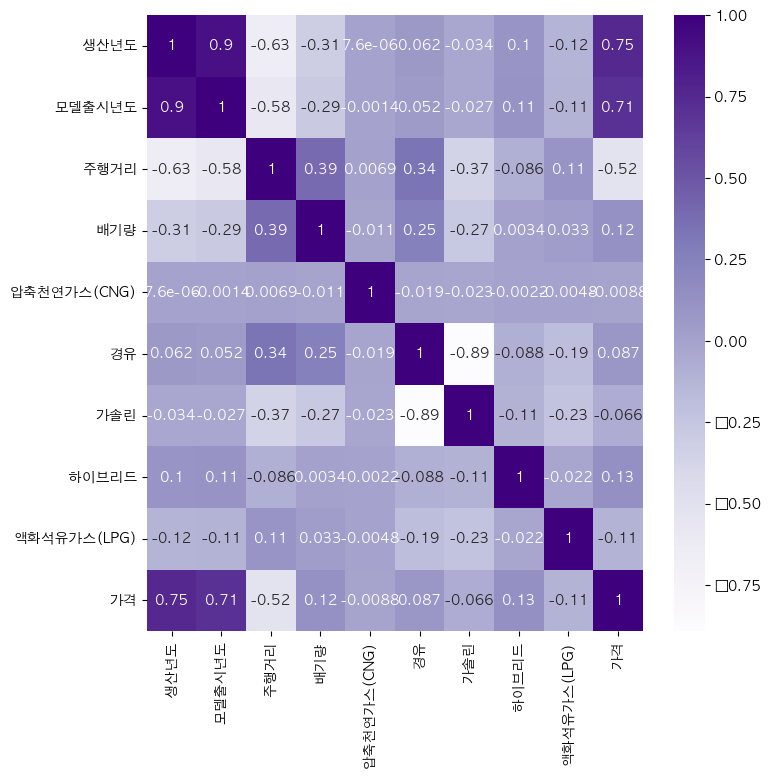

In [34]:
plt.figure(figsize = (8,8))
sns.heatmap(train_num.corr(), annot = True, cmap='Purples')
plt.show()

해석

## 이상치

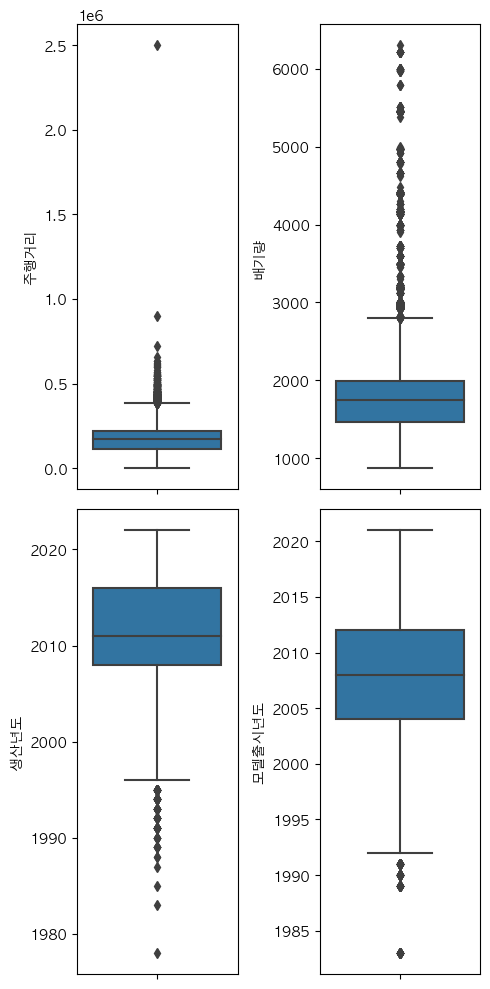

In [35]:
ig, axes = plt.subplots(2,2, figsize = (5,10))

sns.boxplot(y = train['주행거리'], ax = axes[0][0])
sns.boxplot(y = train['배기량'], ax = axes[0][1])

sns.boxplot(y = train['생산년도'], ax = axes[1][0])
sns.boxplot(y = train['모델출시년도'], ax = axes[1][1])

plt.tight_layout()
plt.show()

ins

## Target(가격)


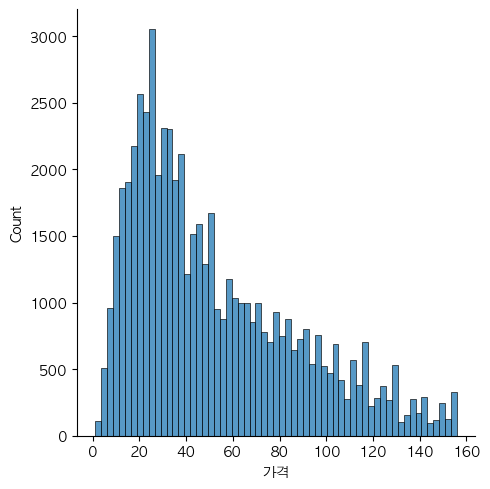

In [35]:
sns.displot(train['가격'])
plt.show()

## 생산년도 & 모델 출시년도 

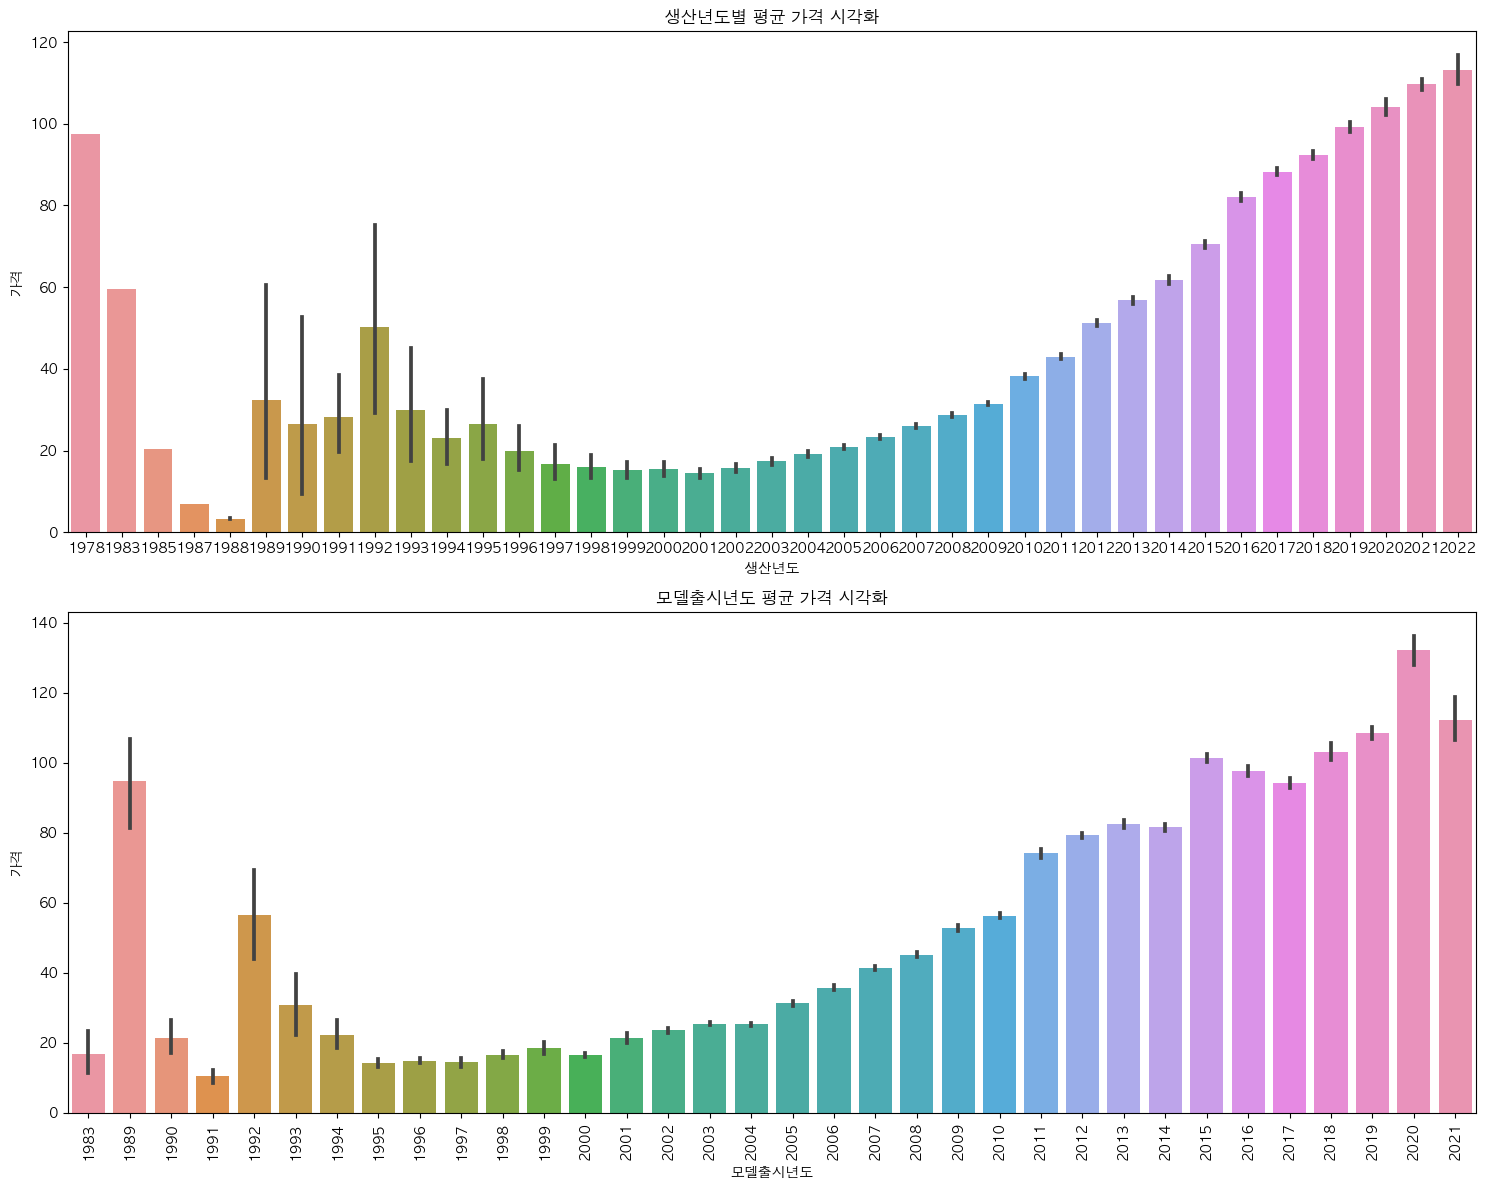

In [37]:

fig, axes = plt.subplots(2, figsize=(15,12))
sns.barplot(x=train['생산년도'], y = train['가격'],ax=axes[0]).set(title='생산년도별 평균 가격 시각화')
sns.barplot(x=train['모델출시년도'], y = train['가격'],ax=axes[1]).set(title='모델출시년도 평균 가격 시각화')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:
print('train 생산년도 시작년도 : ',np.min(train['생산년도'].values))
print('train 생산년도 마지막년도 : ',np.max(train['생산년도'].values))

train 생산년도 시작년도 :  1978
train 생산년도 마지막년도 :  2022


In [10]:
print('train 모델출시년도 시작년도 : ',np.min(train['모델출시년도'].values))
print('train 모델출시년도 마지막년도 : ',np.max(train['모델출시년도'].values))

train 모델출시년도 시작년도 :  1983
train 모델출시년도 마지막년도 :  2021


In [81]:
#모델출시보다 먼저 셍산된 데이터
train[(train['모델출시년도'] > train['생산년도']  )]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
1048,TRAIN_01048,2015,2016,renault,megane,ROG,SLA,111000,1618,0,0,1,0,0,80.34
1175,TRAIN_01175,2007,2014,ford,mondeo,ZYW,OPO,256000,1997,0,1,0,0,0,20.02
1366,TRAIN_01366,2006,2015,ford,galaxy,PIA,MAZ,193727,1997,0,1,0,0,0,22.10
1857,TRAIN_01857,2005,2007,mitsubishi,lancer,GDA,POM,150000,1997,0,0,1,0,0,5.46
2369,TRAIN_02369,2009,2010,ford,focus,BAN,POM,192000,1596,0,0,1,0,0,24.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56816,TRAIN_56816,2015,2017,volvo,xc-60,TOR,KUJ,134884,2400,0,1,0,0,0,142.87
57028,TRAIN_57028,1992,1993,mercedes-benz,e-klasa,BYL,WIE,69309,4196,0,0,1,0,0,139.10
57357,TRAIN_57357,2007,2008,honda,jazz,KRA,MAL,151997,1246,0,0,1,0,0,20.80
57445,TRAIN_57445,2008,2009,mercedes-benz,e-klasa,OLS,WAR,220100,2143,0,1,0,0,0,60.97


In [80]:
#2년 초과로 차이나는 데이터 
train[(train['모델출시년도'] - train['생산년도'] > 2 )]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
1175,TRAIN_01175,2007,2014,ford,mondeo,ZYW,OPO,256000,1997,0,1,0,0,0,20.02
1366,TRAIN_01366,2006,2015,ford,galaxy,PIA,MAZ,193727,1997,0,1,0,0,0,22.10
2788,TRAIN_02788,2011,2014,volkswagen,passat,WEJ,POM,252431,1598,0,1,0,0,0,44.20
4749,TRAIN_04749,2004,2008,ford,fiesta,SLA,ZAC,134200,1388,0,0,1,0,0,10.11
5054,TRAIN_05054,2008,2015,opel,astra,LEG,DOL,196000,1598,0,0,1,0,0,20.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47607,TRAIN_47607,2000,2004,audi,a6,GIZ,LUB,381000,2771,0,0,0,0,1,7.79
47654,TRAIN_47654,2009,2017,opel,insignia,MOG,KUJ,141000,1598,0,0,1,0,0,31.07
48223,TRAIN_48223,2010,2013,renault,kangoo,MIK,SLA,120587,1598,0,0,1,0,0,33.15
48589,TRAIN_48589,2011,2015,volkswagen,touran,KAT,SLA,231487,1598,0,1,0,0,0,33.80


모델 출시를 위해 `모델출시년도` 보다 `생산년도`가 1~2년 정도 빠르게 생산되는 경우가 있다.   
그 이상인 경우는 `모델출시년도`와 `생산년도`의 혼동으로 인한 데이터 오기입의 가능성이 있음  
-> 따라서 차이가 2년초과인 데이터는 삭제 예정 

In [75]:
index1=train[(train['모델출시년도'] - train['생산년도'] > 2 )].index


# Feature Engineering

In [74]:
train1=train.drop(index1).reset_index(drop=True)
train1

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57843,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57844,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57845,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57846,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77
